# **Fakes Profile Detector on Instagram**

In [ ]:
# importing the necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt


# importing the necessary packages into the Machine Learning model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
link_test = "https://www.dropbox.com/s/ap90v0bu9td4k4y/test.csv?dl=1"
link_train = "https://www.dropbox.com/s/uanezjf9y1xb2te/train.csv?dl=1"

In [ ]:
df_test = pd.read_csv(link_test)
df_train = pd.read_csv(link_train)

In [ ]:
df_train.dtypes

profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object

In [ ]:
print("Null Values for our Training Dataset::\n")
df_train.isnull().sum()

Null Values for our Training Dataset::



profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
print("Null Values for our test Dataset:\n")
df_test.isnull().sum()

Null Values for our test Dataset:



profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
print("correlation between our data")
df_train.corr()[["fake"]]

correlation between our data


,fake
profile pic,-0.637315
nums/length username,0.587687
fullname words,-0.298793
nums/length fullname,0.246782
name==username,0.170695
description length,-0.460825
external URL,-0.362809
private,-0.028586
#posts,-0.245355
#followers,-0.093689


### Viewing our data

Let's start by visualizing our correlation from a heat graph

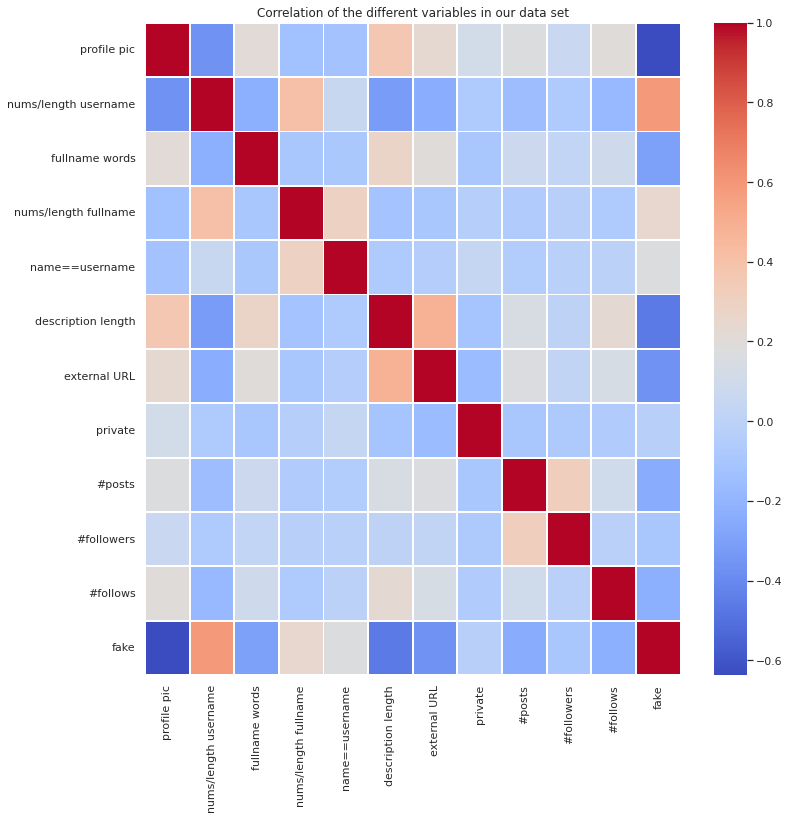

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_train.corr(), cmap='coolwarm', ax=ax , linewidths=.9)
ax.set_title("Correlation of the different variables in our data set")
plt.show()

Furthermore, it is important that we know the proportion of the data in our DataFrame. Let's plot a graph that shows the amount of fakes and not fake in our training data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


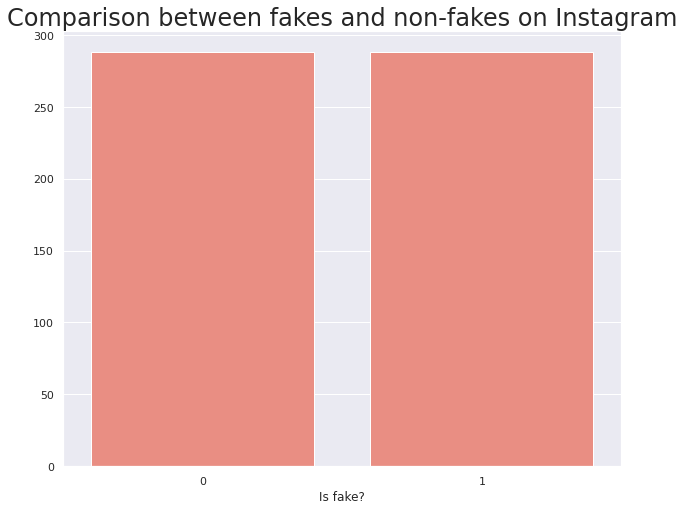

In [ ]:
ax = plt.figure(figsize=(10,8))
ax = sns.countplot(df_train.fake , color="salmon")
ax.set_title("Comparison between fakes and non-fakes on Instagram" , fontsize=24 , loc="center")
ax.set_xlabel("Is fake?")
ax.set_ylabel("")
ax = ax

### Processing our data:

In [ ]:
df_train = df_train.sample(df_train.shape[0],random_state=28)

df_test = df_test.sample(df_test.shape[0],random_state=28)

### Training and test data

In [ ]:
X_train = df_train.drop(["fake"] , axis=1)
y_train = df_train["fake"]

X_test = df_test.drop(["fake"] , axis=1)
y_test = df_test["fake"]

In [ ]:
model = RandomForestClassifier(n_estimators=120 , random_state=28  , max_depth = 100 , max_samples = 350)
model.fit(X_train,y_train)

pred = model.predict(X_test)

print("The average accuracy rate of the model with tuning was:",accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

The average accuracy rate of the model with tuning was: 0.955
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        60
           1       0.96      0.96      0.96        60

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.95       120
weighted avg       0.96      0.96      0.95       120



In [ ]:

model = LinearSVC(random_state=28)
model.fit(X_train,y_train)

pred = model.predict(X_test)

print("The average accuracy of the model was: {}".format(accuracy_score(y_test,pred) ))
print(classification_report(y_test,pred))

The average accuracy of the model was: 0.6916666666666667
              precision    recall  f1-score   support

           0       0.96      0.40      0.56        60
           1       0.62      0.98      0.76        60

    accuracy                           0.69       120
   macro avg       0.79      0.69      0.66       120
weighted avg       0.79      0.69      0.66       120



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
model = KNeighborsClassifier(n_neighbors=10 , weights="distance")
model.fit(X_train,y_train)

pred = model.predict(X_test)

print("The average accuracy of the model was:" , accuracy_score(y_test , pred))
print(classification_report(y_test , pred))

The average accuracy of the model was: 0.875
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        60
           1       0.89      0.85      0.87        60

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120



The average accuracy of the model was: 0.6166666666666667
              precision    recall  f1-score   support

           0       0.77      0.33      0.47        60
           1       0.57      0.90      0.70        60

    accuracy                           0.62       120
   macro avg       0.67      0.62      0.58       120
weighted avg       0.67      0.62      0.58       120



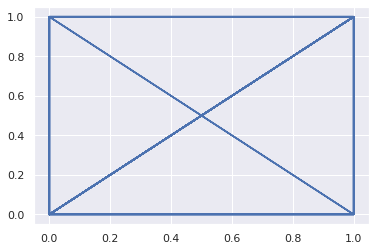

In [ ]:
from sklearn.naive_bayes import GaussianNB
model =  GaussianNB()
model.fit(X_train,y_train)

pred = model.predict(X_test)

print("The average accuracy of the model was:" , accuracy_score(y_test , pred))
print(classification_report(y_test , pred))
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(y_test,pred)

In [ ]:
from sklearn.neural_network import MLPClassifier
model =  MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(346, 12), random_state=28)
model.fit(X_train,y_train)

pred = model.predict(X_test)

print("The average accuracy of the model was:" , accuracy_score(y_test , pred))
print(classification_report(y_test , pred))


The average accuracy of the model was: 0.875
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        60
           1       0.88      0.87      0.87        60

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
#Boosting - Ada Boost
from sklearn.tree import DecisionTreeClassifier

from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 5, learning_rate = 1)
adb.fit(X_train,y_train)
pred = adb.predict(X_test)

In [ ]:
adb.score(X_test,y_test)
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        60
           1       0.92      0.92      0.92        60

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



The average accuracy of the model was: 0.8416666666666667
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        60
           1       0.85      0.83      0.84        60

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120



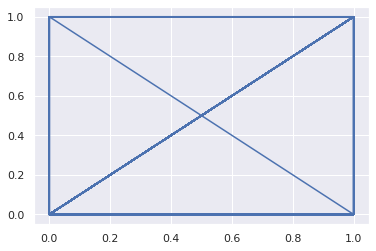

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier(criterion="gini",max_depth=2, random_state=42)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print("The average accuracy of the model was:" , accuracy_score(y_test , pred))
print(classification_report(y_test , pred))
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(y_test,pred)

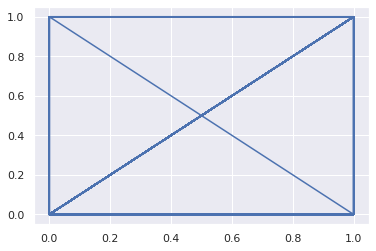

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(y_test,pred)

In [ ]:
# Voting Classifier - Multiple Model Ensemble 
import numpy as np 
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(346, 12), random_state=28)
dt = DecisionTreeClassifier()
svm = LinearSVC()
rf=RandomForestClassifier()
nb=GaussianNB()
kn=KNeighborsClassifier(n_neighbors=10 , weights="distance")

evc = VotingClassifier( estimators= [('mlp',mlp),('dt',dt),('svm',svm),('rf',rf),('nb',nb),('kn',kn)], voting = 'hard')

evc.fit(X_train.iloc[1:518],y_train.iloc[1:518])
pred = evc.predict(X_test)
print("The average accuracy of the model was:" , accuracy_score(y_test , pred))
print(classification_report(y_test , pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


The average accuracy of the model was: 0.965
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        60
           1       0.96      0.97      0.97        60

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.96       120
weighted avg       0.97      0.97      0.96       120



In [ ]:
pred = evc.predict([[1,0.0,1,0.18181818181818182,0,7,0,0,5,196,163]])
print(pred[0])

0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have 

In [ ]:
pip install instagramy

In [ ]:
from instagramy import InstagramUser
import time

In [ ]:
time.sleep(10)
username='nbot_indi14'
user = InstagramUser('md_rameez14', sessionid='')


print(user.is_verified)

print(user.biography)

lenbio=len(user.biography)
fullname=user.fullname
no_of_posts=user.number_of_posts
no_of_followers=user.number_of_followers
no_of_following=user.number_of_followings
is_private=user.is_private
website=user.website
dp_url=user.profile_picture_url

print(lenbio)
print(fullname)
print(no_of_posts)
print(no_of_followers)
print(no_of_following)
print(is_private)
print(website)
print(dp_url)
#user has profile picture or not
at1_dp = 1
import cv2
import numpy as np
from PIL import Image
urllib.request.urlretrieve("https://instagram.fevn6-1.fna.fbcdn.net/v/t51.2885-19/44884218_345707102882519_2446069589734326272_n.jpg?efg=eyJybWQiOiJpZ19hbmRyb2lkX21vYmlsZV9uZXR3b3JrX3N0YWNrX3JldHJ5X2Nvbm5lY3Rpb25fcmVmdXNlZDpjb250cm9sIn0&_nc_ht=instagram.fevn6-1.fna.fbcdn.net&_nc_cat=1&_nc_ohc=qQm-VYggXIkAX_du3Gr&edm=AEVnrqQBAAAA&ccb=7-4&ig_cache_key=YW5vbnltb3VzX3Byb2ZpbGVfcGlj.2-ccb7-4&oh=00_AT_fiEO5z_wGv1dShTa23qo42Dk01V_YgsDXiaLdCFmYmQ&oe=628B96CF&_nc_sid=3ae735","ch1.jpg")

urllib.request.urlretrieve(dp_url,"ch2.jpg")

original = cv2.imread("ch1.jpg")
duplicate = cv2.imread("ch2.jpg")

if original.shape == duplicate.shape:
 print("The Dp of the account is InstaGram's Default one")
 at1_dp=0
else:
  print("they are different")


#ratio of number of numerical chars in fullname to its length
at2_fullname_ntoc=0

for s in fullname:
    if s.isnumeric():
        at2_fullname_ntoc += 1
at2_fullname_ntoc/=len(fullname)

#full name in word tokens
at3_no_of_words_token=res = len(fullname.split())

#ratio of number of numerical chars in username to its length
at4_username_ntoc=0
for s in username:
    if s.isnumeric():
        at4_username_ntoc += 1
at4_username_ntoc/=len(username)

#are username and full name literally the same
at5_un_fn_same=0
if username==fullname:
    at5_un_fn_same=1

#bio length in characters
at6_bio_len=lenbio

#has external URL or not
at7_has_url=1
if website==None:
    at7_has_url=0

#private or not
at8_pvt=0
if is_private==True:
    at8_pvt=1

#number of posts
at9_no_of_posts=no_of_posts

#number of followers
at10_no_of_followers=no_of_followers

#number of follows
at11_no_of_follows=user.number_of_followings
print(at1_dp)
print(at2_fullname_ntoc)
print(at3_no_of_words_token)
print(at4_username_ntoc)
print(at5_un_fn_same)
print(at6_bio_len)
print(at7_has_url)
print(at8_pvt)
print(at9_no_of_posts)
print(at10_no_of_followers)
print(at11_no_of_follows)

False
nope
no
7
Muhammed Rameez
0
3
29
True
None
https://instagram.fmxp2-2.fna.fbcdn.net/v/t51.2885-19/44884218_345707102882519_2446069589734326272_n.jpg?_nc_ht=instagram.fmxp2-2.fna.fbcdn.net&_nc_cat=1&_nc_ohc=qQm-VYggXIkAX-12262&edm=AId3EpQBAAAA&ccb=7-4&ig_cache_key=YW5vbnltb3VzX3Byb2ZpbGVfcGlj.2-ccb7-4&oh=00_AT9MT9bfA5ApbhHjrf8AkUXOjXhz7g1Q9uuOcq0Thuvzbg&oe=628B96CF&_nc_sid=705020
The Dp of the account is InstaGram's Default one
0
0.0
2
0.18181818181818182
0
7
0
1
0
3
29


In [ ]:
pred = evc.predict([[at1_dp,at2_fullname_ntoc,at3_no_of_words_token,at4_username_ntoc,at5_un_fn_same,at6_bio_len,at7_has_url,at8_pvt,at9_no_of_posts,at10_no_of_followers,at11_no_of_follows]])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have 

In [ ]:
if pred==0:
  print("The account is genuine and authentic")
else:
  print("The account is fake")

The account is fake


In [ ]:
import cv2
import numpy as np
import urllib
url = "https://scontent-iad3-2.cdninstagram.com/v/t51.2885-19/224959976_993081651464547_5795497114547961172_n.jpg?stp=dst-jpg_s320x320&_nc_ht=scontent-iad3-2.cdninstagram.com&_nc_cat=103&_nc_ohc=pWsk5vDNNDgAX-i5kSs&edm=ABfd0MgBAAAA&ccb=7-4&oh=00_AT884MMah5avZX2HK_B-YwZkAJMnw9LSwZEXy9EjM1r4Mg&oe=628C31B2&_nc_sid=7bff83"
url_response = urllib.request.urlopen(url)

In [ ]:

img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
#img = cv2.imdecode(img_array, -1)


In [ ]:
if original.shape == duplicate.shape:
 print("The images have same size and channels")
difference = cv2.subtract(original, duplicate)
b, g, r = cv2.split(difference)
if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
 print("The images are completely Equal")

NameError: ignored

In [ ]:
import cv2
import numpy as np
from PIL import Image
urllib.request.urlretrieve("https://instagram.fevn6-1.fna.fbcdn.net/v/t51.2885-19/44884218_345707102882519_2446069589734326272_n.jpg?efg=eyJybWQiOiJpZ19hbmRyb2lkX21vYmlsZV9uZXR3b3JrX3N0YWNrX3JldHJ5X2Nvbm5lY3Rpb25fcmVmdXNlZDpjb250cm9sIn0&_nc_ht=instagram.fevn6-1.fna.fbcdn.net&_nc_cat=1&_nc_ohc=qQm-VYggXIkAX_du3Gr&edm=AEVnrqQBAAAA&ccb=7-4&ig_cache_key=YW5vbnltb3VzX3Byb2ZpbGVfcGlj.2-ccb7-4&oh=00_AT_fiEO5z_wGv1dShTa23qo42Dk01V_YgsDXiaLdCFmYmQ&oe=628B96CF&_nc_sid=3ae735","ch1.jpg")

urllib.request.urlretrieve("https://scontent-iad3-2.cdninstagram.com/v/t51.2885-19/224959976_993081651464547_5795497114547961172_n.jpg?stp=dst-jpg_s320x320&_nc_ht=scontent-iad3-2.cdninstagram.com&_nc_cat=103&_nc_ohc=pWsk5vDNNDgAX-i5kSs&edm=ABfd0MgBAAAA&ccb=7-4&oh=00_AT884MMah5avZX2HK_B-YwZkAJMnw9LSwZEXy9EjM1r4Mg&oe=628C31B2&_nc_sid=7bff83","ch2.jpg")

original = cv2.imread("ch1.jpg")
duplicate = cv2.imread("ch2.jpg")

if original.shape == duplicate.shape:
 print("The images have same size and channels")
else:
  print("they are different")


they are different


In [ ]:



from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time, urllib.request
import requests
import pyautogui
def launchbrowser():
    Path = r"C:\Users\Muhammed Rameez\Downloads\chromedriver.exe"
    driver=webdriver.Chrome(Path)

    driver.get("https://www.instagram.com/")
    return driver
dr=launchbrowser()

time.sleep(5)
username=dr.find_element_by_css_selector("input[name='username']")
password=dr.find_element_by_css_selector("input[name='password']")
username.clear()
password.clear()
username.send_keys("nbot_indi14")
time.sleep(3)
password.send_keys("Instapass14")
time.sleep(5)
login = dr.find_element_by_css_selector("button[type='submit']").click()

time.sleep(10)
notnow2 = dr.find_element_by_xpath("//button[contains(text(), 'Not Now')]").click()

#searchbox
time.sleep(5)
searchbox=dr.find_element_by_css_selector("input[placeholder='Search']")
searchbox.clear()
searchbox.send_keys("03.1602827168")
time.sleep(5)
searchbox.send_keys(Keys.ENTER)
time.sleep(5)
searchbox.send_keys(Keys.ENTER)
# session_url = dr.command_executor._url

# session_id = dr.session_id
#
# print(session_url)
# print(session_id)

#tripledot
time.sleep(5)
trip = dr.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/div[1]/div/button').click()
print("triple dot clicked")

#clicking report op
time.sleep(4)
blck = dr.find_element_by_xpath("//button[contains(text(),'Report')]").click()

#clicking report acc
time.sleep(4)
rep_acc = dr.find_element_by_xpath("/html/body/div[6]/div/div/div/div[2]/div/div/div/div[3]/button[2]").click()


#clicking 1st op
time.sleep(3)
op1 = dr.find_element_by_xpath("/html/body/div[6]/div/div/div/div[2]/div/div/div/div[3]/button").click()

#clicking its spam
time.sleep(3)
op2 = dr.find_element_by_xpath("/html/body/div[6]/div/div/div/div[2]/div/div/div/div[3]/button").click()

#close
time.sleep(3)
close = dr.find_element_by_xpath("//button[contains(text(),'Close')]").click()

#menu
time.sleep(3)
menu = dr.find_element_by_xpath("//nav/div[2]/div/div/div[3]/div/div[6]/div/span").click()

#logout
time.sleep(3)
logout = dr.find_element_by_xpath("//nav/div[2]/div/div/div[3]/div/div[6]/div[2]/div[2]/div[2]/div[2]/div").click()

#close the web driver tab
time.sleep(3)
pyautogui.keyDown('ctrl')
time.sleep(0.25)
pyautogui.keyDown('w')
time.sleep(0.5)
pyautogui.keyUp('ctrl')
pyautogui.keyUp('w')